# Your Title Here

**Kancheng Yin, Xuewen(Daphne) Yang**

## Summary of Findings


### Introduction
TODO

### Baseline Model

- Our model has two parameters `'mos_gender'` and `'mos_ethnicity'`. These two parameters are both nominal, so we performed one-hot encoding on these two parameters.
- The R^2 0.6746742345511232, 0.6750599520383693

### Final Model
TODO

### Fairness Analysis
TODO

## Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

In [79]:
# Load the data of NYPD Civilian Complaints
data = os.path.join('data', 'allegations_202007271729.csv')
police_data = pd.read_csv(data)
police_data = police_data.fillna({'complainant_ethnicity': 'Unknown'})
print(police_data.shape)
police_data.head()

(33358, 27)


,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,Unknown,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


### Baseline Model

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
X = police_data[['mos_gender', 'rank_incident']]
y = police_data['mos_ethnicity']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
def modify_time(df):
    res = pd.DataFrame()
    receive_time = pd.to_datetime([f'{y}-{m}-01' for y, m in zip(df['year_received'], df['month_received'])])
    close_time = pd.to_datetime([f'{y}-{m}-01' for y, m in zip(df['year_closed'], df['month_closed'])])
    res['time_length'] = (close_time - receive_time).days
    return res

def same_ethn(df):
    res = pd.DataFrame()
    res['same_ethnicity'] = df['complainant_gender'] == df['mos_gender']
    return res

pl_time = Pipeline([
    ('modify', FunctionTransformer(modify_time)),
    ('std', StandardScaler()),
])

pl_ethn = Pipeline([
    ('ethn_modify', FunctionTransformer(same_ethn)),
    ('ohe1', OneHotEncoder(handle_unknown='ignore', drop='first'))    
])

preproc = ColumnTransformer(
    transformers = [
        ('ohe', OneHotEncoder(handle_unknown = 'ignore', drop = 'first'), ['fado_type']),
        ('time', pl_time, ['year_received', 'month_received', 'year_closed', 'month_closed']),
        ('ethn', pl_ethn, ['complainant_gender', 'mos_gender'])
    ])

pl = Pipeline([
    ('preprocessor', preproc2),
    ('clf', DecisionTreeClassifier(max_depth = 82))
])

In [69]:
X = police_data[['mos_gender', 'rank_incident']]
y = police_data['mos_ethnicity']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [70]:
pl = Pipeline([
    ('preproc', ColumnTransformer(
        transformers = [
            ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first'), ['rank_incident', 'mos_gender'])
        ])
    ),
    ('clf', DecisionTreeClassifier())
])
pl.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['rank_incident',
                                                   'mos_gender'])])),
                ('clf', DecisionTreeClassifier())])

In [71]:
pl.score(X_train, y_train), pl.score(X_test, y_test)

(0.5554800543608602, 0.5462829736211031)

In [72]:
metrics.f1_score(y_test, pl.predict(X_test), average='weighted')

0.41802334183047757

### Final Model

In [ ]:
receive_time = pd.to_datetime([f'{y}-{m}-01' for y, m in zip(df['year_received'], df['month_received'])])
close_time = pd.to_datetime([f'{y}-{m}-01' for y, m in zip(df['year_closed'], df['month_closed'])])
df['time_length'] = (close_time - receive_time).days

In [94]:
# # X2 = police_data[
# #     ['mos_gender', 'complainant_gender', 'mos_ethnicity', 'complainant_ethnicity',
# #      'mos_age_incident', 'rank_now']
# # ]
# X2 = police_data[
#     ['mos_gender', 'rank_incident',
#      'mos_age_incident', 'rank_now']
# ]
# # y2 = police_data['rank_incident']
# y2 = police_data['mos_ethnicity']
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2)
X2 = police_data[['fado_type', 'complainant_gender', 'mos_gender', 'year_received', 'month_received', 'year_closed', 'month_closed']]
y2 = police_data['rank_incident']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2)

In [95]:
def modify_time(df):
    res = pd.DataFrame()
    receive_time = pd.to_datetime([f'{y}-{m}-01' for y, m in zip(df['year_received'], df['month_received'])])
    close_time = pd.to_datetime([f'{y}-{m}-01' for y, m in zip(df['year_closed'], df['month_closed'])])
    res['time_length'] = (close_time - receive_time).days
    return res

def same_ethn(df):
    res = pd.DataFrame()
    res['same_ethnicity'] = df['complainant_gender'] == df['mos_gender']
    return res

pl_time = Pipeline([
    ('modify', FunctionTransformer(modify_time)),
    ('std', StandardScaler()),
])

pl_ethn = Pipeline([
    ('ethn_modify', FunctionTransformer(same_ethn)),
    ('ohe1', OneHotEncoder(handle_unknown='ignore', drop='first'))    
])

preproc2 = ColumnTransformer(
    transformers = [
        ('ohe', OneHotEncoder(handle_unknown = 'ignore', drop = 'first'), ['fado_type']),
        ('time', pl_time, ['year_received', 'month_received', 'year_closed', 'month_closed']),
        ('ethn', pl_ethn, ['complainant_gender', 'mos_gender'])
    ])

pl2 = Pipeline([
    ('preprocessor', preproc2),
    ('clf', DecisionTreeClassifier(max_depth = 82))
])

In [96]:
pl2.fit(X_train2, y_train2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['fado_type']),
                                                 ('time',
                                                  Pipeline(steps=[('modify',
                                                                   FunctionTransformer(func=<function modify_time at 0x7fab89969700>)),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['year_received',
                                                   'month_received',
                                                   'year_closed',
                                                   'month_closed']),
                                                 ('ethn',
                                                  Pipeline(steps=[('ethn_modify',
                                                                   FunctionTransformer(func=<function same_ethn at 0x7fab89969790>)),
                                                                  ('ohe1',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['complainant_gender',
                                                   'mos_gender'])])),
                ('clf', DecisionTreeClassifier(max_depth=82))])

In [93]:
pl2.score(X_test2, y_test2)

0.5507194244604317

In [97]:
def modify(df):
    res = pd.DataFrame()
    res['same_gender'] = df['mos_gender'] == df['complainant_gender']
    res['same_ethnicity'] = df['mos_ethnicity'] == df['complainant_ethnicity']
    return res

p = Pipeline([
    ('modify', FunctionTransformer(modify)),
    ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first')),
])

pl2 = Pipeline([
    ('preproc', ColumnTransformer(
        transformers = [
#             ('modify', p, ['mos_gender', 'complainant_gender', 'mos_ethnicity', 'complainant_ethnicity']),
            ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first'), ['rank_incident','rank_now','mos_gender']),
            ('std', StandardScaler(), ['mos_age_incident'])
        ])
    ),
    ('clf', DecisionTreeClassifier())
])

pl2.fit(X_train2, y_train2)

ValueError: A given column is not a column of the dataframe

In [75]:
hyperparameters = {
    'clf__max_depth': np.arange(2, 50)
}
searcher = GridSearchCV(pl2, hyperparameters, cv=5, scoring='accuracy')
searcher.fit(X_train2, y_train2)

/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sk

KeyboardInterrupt: 

In [ ]:
searcher.best_params_

In [64]:
searcher.score(X_train2, y_train2), searcher.score(X_test2, y_test2)

(0.8406747142057719, 0.8315347721822542)

### Fairness Analysis

/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


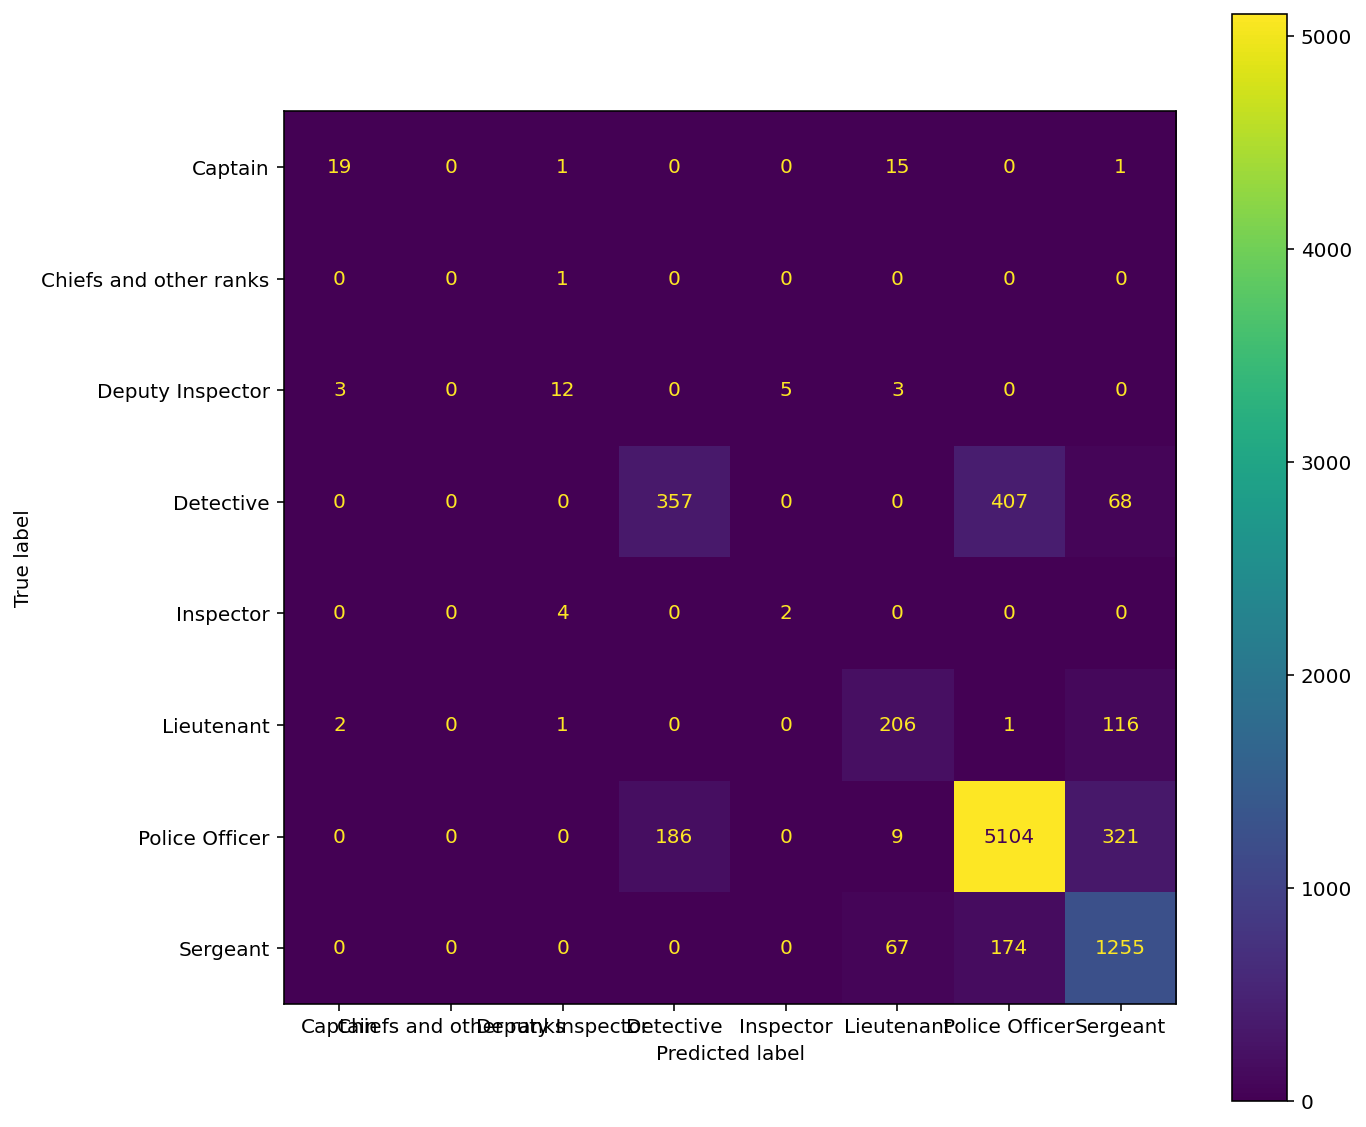

In [53]:
from sklearn import metrics
fig, ax = plt.subplots(figsize=(10, 10))
metrics.plot_confusion_matrix(pl2, X_test2, y_test2, ax=ax)

In [57]:
metrics.f1_score(y_test2, searcher.predict(X_test2), average='weighted')

0.8287041497156816

In [55]:
metrics.accuracy_score(y_test2, searcher.predict(X_test2))

0.8338129496402877